In [1]:
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import nibabel
import numpy as np

from dpipe.im.visualize import slice3d
from skimage import measure

In [380]:
df = pd.read_csv('/anvar/public_datasets/preproc_study/gbm/meta.csv')

/home/anvar/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,134,142,144,151,153,154,157,160,161,166,168,169,175,177,178) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [383]:
df.groupby('SeriesInstanceUID').count()

,AccessionNumber,AcquisitionDate,AcquisitionNumber,AcquisitionTime,AdditionalPatientHistory,AngioFlag,BitsAllocated,BitsStored,BodyPartExamined,CardiacNumberOfImages,...,PerformedStationName,PlacerOrderNumberImagingServiceRequestRetired,ReasonForTheImagingServiceRequest,ReasonForTheRequestedProcedure,RequestedContrastAgent,RequestedProcedureComments,RequestedProcedurePriority,AcquisitionDuration,DiffusionBValue,LengthToEnd
SeriesInstanceUID,,,,,,,,,,,,,,,,,,,,,
1.2.276.0.7230010.3.1.3.8323329.2500485.1541623930.211595,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1.2.276.0.7230010.3.1.3.8323329.2500557.1541623933.133846,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1.2.276.0.7230010.3.1.3.8323329.2500631.1541623943.495712,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1.2.276.0.7230010.3.1.3.8323329.2500703.1541623956.391207,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1.2.276.0.7230010.3.1.3.8323329.2500775.1541623962.730148,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.3.6.1.4.1.14519.5.2.1.8862.4001.546462055894409848329223976518,23,23,23,23,23,23,23,23,23,23,...,0,0,0,0,0,0,0,0,0,0
1.3.6.1.4.1.14519.5.2.1.8862.4001.609705420088117660227141140219,24,24,24,24,0,24,24,24,24,0,...,0,0,0,0,0,0,0,0,0,0
1.3.6.1.4.1.14519.5.2.1.8862.4001.724789870643862849694451333256,22,22,22,22,0,22,22,22,22,0,...,0,0,0,0,0,0,0,0,0,0


In [386]:
# df.query('SeriesInstanceUID=="1.3.6.1.4.1.14519.5.2.1.8862.4001.848905768294232154546172773832"').PatientID

# GBM

In [330]:
for patient in folder.glob('*'):
    img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()
    v, c = np.unique(img_seg, return_counts=True)
    print(patient.name)
    print(c)
    print()

TCGA-02-0086
[5861113   14225   66010   58652]

TCGA-02-0102
[5991029      39    8462     470]

TCGA-02-0059
[8517167   28051   45580   49202]

TCGA-02-0069
[11494587    53004    66336    11073]

TCGA-19-2624
[12413359    31733   131884     5936]

TCGA-06-0182
[11255138     6229   112043    31390]

TCGA-08-0360
[12556657     2772     7461     6710]

TCGA-02-0006
[5970428     232   28356     984]

TCGA-19-2631
[5942618   21693  133603   29746]

TCGA-12-1094
[8182288    5990   29851   18671]

TCGA-06-2570
[9624463   24798   15729   11810]

TCGA-06-0119
[10528040    16097    63721    48142]

TCGA-06-0145
[9259214   16044   26083   29859]

TCGA-08-0509
[12548693     2074    15795     7038]

TCGA-06-5408
[9637096   15574  101250   38080]

TCGA-02-0116
[6191220    1693   21830   25257]

TCGA-06-0188
[9752340     120   36282    3258]

TCGA-76-6661
[6782488   48844   27909   52759]

TCGA-02-0047
[5820450   12409  135180   31961]

TCGA-12-3650
[8627437      33   10787    1743]

TCGA-02-0064
[11

In [394]:
folder = Path('/anvar/public_datasets/preproc_study/gbm/orig/')

In [400]:
patient = 'TCGA-08-0360'#'TCGA-02-0059'#'TCGA-06-0188'

In [401]:
img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()
# brain_mask = nibabel.load(folder / patient / 'CT1_mask.nii.gz').get_fdata()

# CT1.nii.gz  CT1_SEG.nii.gz  FLAIR.nii.gz  T1.nii.gz  T2.nii.gz
# 46

print(img_t1.shape, img_t1c.shape, img_t2.shape, img_flair.shape )

(256, 256, 44) (256, 256, 124) (256, 256, 126) (256, 256, 32)


In [412]:
folder = Path('/anvar/public_datasets/preproc_study/gbm/1_reg/')
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz')

folder = Path('/anvar/public_datasets/preproc_study/gbm/2a_interp/')
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz')


folder = Path('/anvar/public_datasets/preproc_study/gbm/3a_atlas/')
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz')


# folder = Path('/anvar/public_datasets/preproc_study/gbm/orig/')
# img_t1 = nibabel.load(folder / patient / 'T1.nii.gz')

In [413]:
img_t1.header.get_zooms()

(1.0, 1.0, 1.0)

In [414]:
img_t1.shape

(240, 240, 155)

In [402]:
# for i in range(150):
#     v,c = np.unique(img_seg[..., i], return_counts=True)
#     print(i)
#     print(c)

In [403]:
# for c in _contours:
#     print(c.shape)

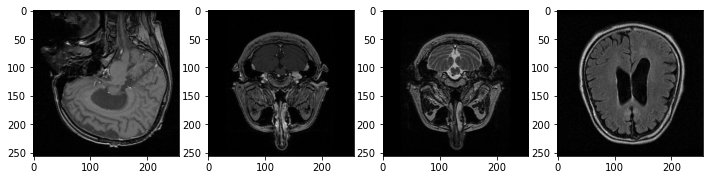

In [405]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

def get_contours(seg):
    contours = measure.find_contours(seg, 2)
    c = measure.find_contours(seg, 0)[0]
    contours.append(c)
    return contours

i=20

axs[0].imshow(img_t1[..., i].T, cmap='gray')
axs[1].imshow(img_t1c[..., i].T, cmap='gray')
axs[2].imshow(img_t2[..., i].T, cmap='gray')
axs[3].imshow(img_flair[..., i].T, cmap='gray')
# axs[4].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')


# seg = img_seg[..., i].T
# _contours = get_contours(seg)
# contours = [_contours[0], _contours[2], contours[-1]]

# for ax in axs.flatten():
#     for c, color in zip(contours, ['tab:green','tab:blue','tab:red']):
#         ax.plot(c[:, 1], c[:, 0], c=color, alpha=1, lw=0.7)

# for ax in axs.flatten():
#     ax.set_axis_off()

# plt.tight_layout()
# plt.savefig('../figures/gbm_4_with_contours.png', dpi=300)

In [373]:
patient = 'TCGA-06-0188'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()
# brain_mask = nibabel.load(folder / patient / 'CT1_mask.nii.gz').get_fdata()

# CT1.nii.gz  CT1_SEG.nii.gz  FLAIR.nii.gz  T1.nii.gz  T2.nii.gz
# 46

print(img_flair.shape)

(240, 240, 170)


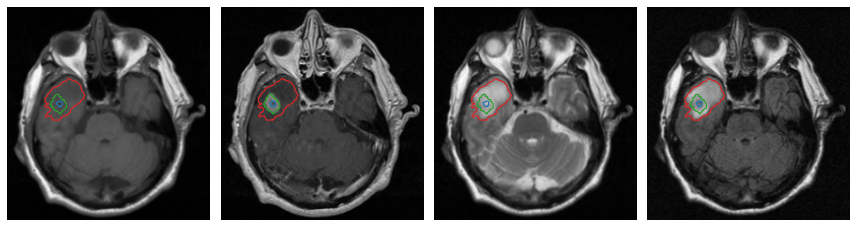

In [374]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

def get_contours(seg):
    contours = measure.find_contours(seg, 2)
    c = measure.find_contours(seg, 0)[0]
    contours.append(c)
    return contours

i = 47
xi_start = 10
xi_end = 220
yi_start = 30
yi_end = 230

axs[0].imshow(img_t1[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[1].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[2].imshow(img_t2[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[3].imshow(img_flair[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
# axs[4].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')


seg = img_seg[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]
contours = get_contours(seg)

for ax in axs.flatten():
    for c, color in zip(contours, ['tab:green','tab:blue','tab:red']):
        ax.plot(c[:, 1], c[:, 0], c=color, alpha=1, lw=1.2)

for ax in axs.flatten():
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('../figures/gbm_4_with_contours.png', dpi=300)

# BGPD

In [375]:
root = Path('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/')

patient ='Patient_98814'# 'Patient_62817'

In [376]:
img_t1c = nibabel.load(root / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(root / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(root / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(root / patient / 'T2.nii.gz').get_fdata()
img_seg = nibabel.load(root / patient / 'mask_GTV_FLAIR.nii.gz').get_fdata()

root = Path('/anvar/public_datasets/preproc_study/bgpd/5_ss_shared/')
brain_mask = nibabel.load(root / patient / 'FLAIR_mask.nii.gz').get_fdata()

In [377]:
# vol = dict()
# for patient in root.glob('*'):
#     mask = nibabel.load(root / patient / 'mask_GTV_FLAIR.nii.gz').get_fdata()
#     vol[patient.name] = mask.sum()
# sorted(vol.items(), key=lambda x: x[1])

In [379]:
img_seg.sum()

195536.0

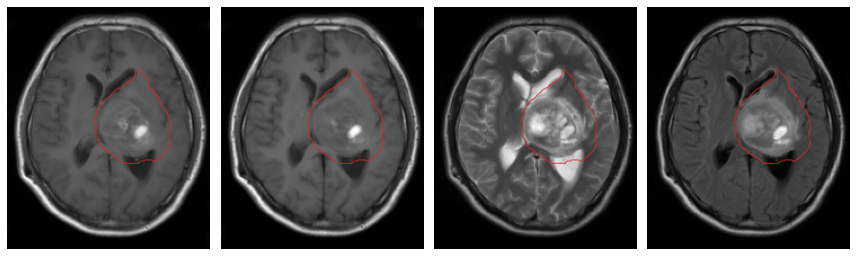

In [378]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

i = 57
xi_start = 15
xi_end = 230
yi_start = 25
yi_end = 205

axs[0].imshow(img_t1[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[1].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[2].imshow(img_t2[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[3].imshow(img_flair[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')

seg = img_seg[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]
c = measure.find_contours(seg)[0]

for i,ax in enumerate(axs.flatten()):
    ax.plot(c[:, 1], c[:, 0], c='tab:red', alpha=.7, lw=1.2)

for ax in axs.flatten():
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('../figures/bgpd_4_with_contours.png', dpi=300)

# Brain-tumor histogram comparison illustration

In [23]:
i = 57
xi_start = 15
xi_end = 230
yi_start = 25
yi_end = 205

x = img_flair[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]
y = img_seg[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]
z = brain_mask[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]



In [70]:
x_healthy = x[z.astype(bool)^y.astype(bool)]
x_tumor = x[y.astype(bool)] 

n = 20
size, bins = np.histogram(list(x_healthy)+list(x_tumor), n)
x_h, _ = np.histogram(x_healthy, bins=bins)
x_t, _ = np.histogram(x_tumor, bins=bins)

x_h = x_h / x_h.sum()
x_t = x_t / x_t.sum()

In [95]:
def compute_kl(x_h, y_h):

    x = x_h/x_h.sum()
    y = y_h/y_h.sum()
    
    x = np.clip(x, 10e-9, 1)
    y = np.clip(y, 10e-9, 1)
            
    return (x*np.log2(x/y)).sum(), x, y

def compute_l2(x_h, y_h):
    x = x_h/x_h.sum()
    y = y_h/y_h.sum()
    
    return np.sqrt(((x-y)**2).sum())

def compute_hellinger(x_h, y_h):
    x = x_h/x_h.sum()
    y = y_h/y_h.sum()
    return 1 / np.sqrt(2) * np.sqrt(((np.sqrt(x)-np.sqrt(y))**2).sum())

In [96]:
compute_kl(x_h, x_t)

(1.4415377707318966,
 array([3.07751738e-02, 2.49163018e-02, 3.77929436e-02, 7.18516611e-02,
        3.70654133e-01, 4.40509915e-01, 2.18902910e-02, 1.60958022e-03,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08, 1.00000000e-08,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08, 1.00000000e-08,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08, 1.00000000e-08]),
 array([0.02044025, 0.01179245, 0.01205451, 0.01912998, 0.10796646,
        0.17190776, 0.10744235, 0.13836478, 0.1831761 , 0.11242138,
        0.04585954, 0.02987421, 0.00524109, 0.00786164, 0.00393082,
        0.0028826 , 0.00471698, 0.00969602, 0.00445493, 0.00078616]))

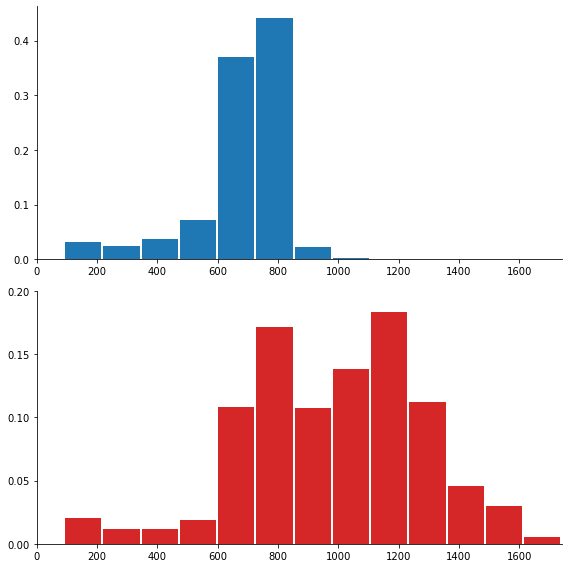

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].bar(bins[1:], x_h, width=120, color='tab:blue', alpha=1, label='Healthy tissue')
ax[1].bar(bins[1:], x_t, width=120, color='tab:red', alpha=1, label='Tumour tissue')
ax[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2]);
ax[0].set_xlim(0, 1740)
ax[1].set_xlim(0, 1740)


# Hide the right and top spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('../figures/bgpd_brain_tumor_histograms.png', dpi=300)

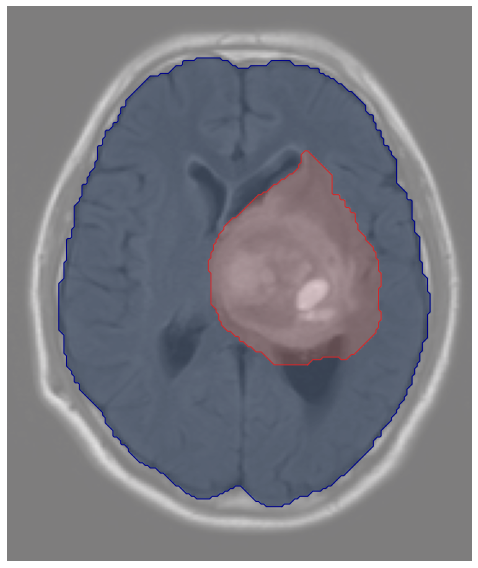

In [89]:
plt.figure(figsize=(8,8))
plt.imshow(x, cmap='gray')

ax = plt.gca()
ax.set_axis_off()

cy = measure.find_contours(y)[0]
plt.plot(cy[:, 1], cy[:, 0], c='tab:red', alpha=1, lw=1)
plt.imshow(y, cmap=plt.cm.Reds, alpha=0.3)

cz = measure.find_contours(z-y)[0]
plt.plot(cz[:, 1], cz[:, 0], c='darkblue', alpha=1, lw=1)
plt.imshow(z-y, cmap=plt.cm.Blues, alpha=0.3);

plt.tight_layout()
plt.savefig('../figures/bgpd_brain_tumor_with_contours.png', dpi=300)

# Rigid Reg results

In [314]:
print('orig')
print('===')
folder = Path('/anvar/public_datasets/preproc_study/bgpd/orig')
patient = '607_18'#'608_18_4'
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz')
img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz')

print(img_t1c.shape)
print(img_flair.shape)
# print(img_t1c.header.get_zooms())
# print(img_t1c.affine)

print('\n1_reg')
print('===')

folder = Path('/anvar/public_datasets/preproc_study/bgpd/1_reg')
# patient = '607_18'#'608_18_4'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz')
print(img_t1c.shape)
# print(img_t1c.header.get_zooms())
# print(img_t1c.affine)

# print('\n4a_resamp')
# print('===')

# folder = Path('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')
# # patient = '607_18'#'608_18_4'
# img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz')
# print(img_t1c.shape)
# print(img_t1c.header.get_zooms())
# print(img_t1c.affine)

orig
===
(256, 256, 226)
(256, 256, 124)

1_reg
===
(124, 256, 256)


In [303]:
# folder = Path('/anvar/public_datasets/preproc_study/gbm/orig')

# patient = 'TCGA-06-0185'


folder = Path('/anvar/public_datasets/preproc_study/bgpd/orig')
patient = '255_18'#'607_18'#'608_18_4'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(256, 256, 150) (512, 512, 160) (256, 256, 150) (512, 512, 24)


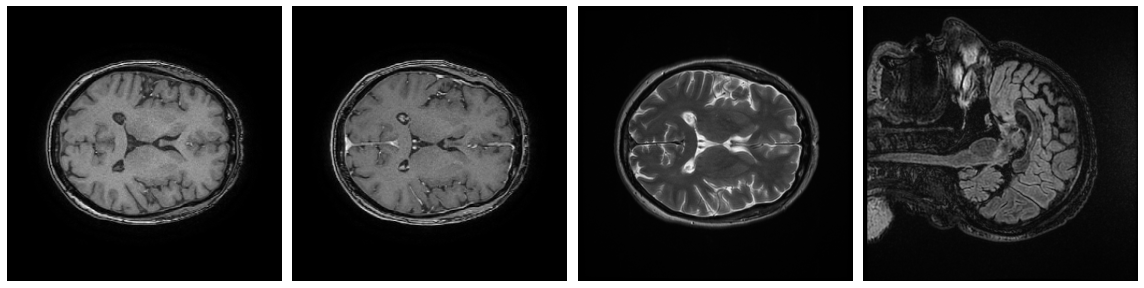

In [304]:
fig, axs = plt.subplots(1, 4, figsize=(16,6))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[..., img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [305]:
folder = Path('/anvar/public_datasets/preproc_study/bgpd/1_reg')
patient = '255_18'#'607_18'#'608_18_4'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(160, 512, 512) (160, 512, 512) (160, 512, 512) (160, 512, 512)


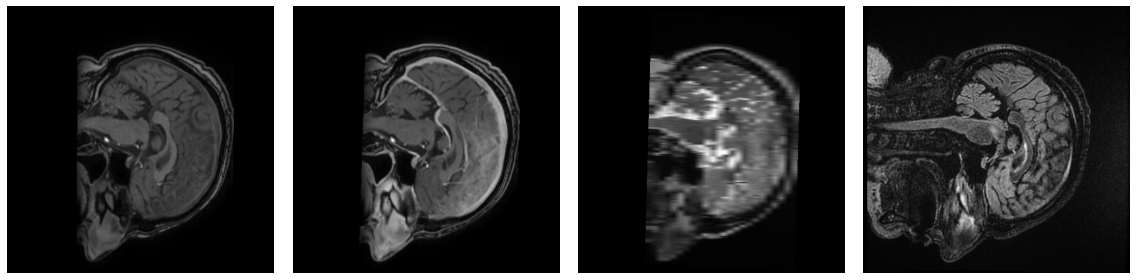

In [306]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[img_t1.shape[0]//2, ...], cmap='gray')
axs[1].imshow(img_t1c[img_t1c.shape[0]//2, ...], cmap='gray')
axs[2].imshow(img_t2[img_t2.shape[0]//2,...], cmap='gray')
axs[3].imshow(img_flair[ img_flair.shape[0]//2, ...], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [307]:
folder = Path('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')
patient = '255_18'#'607_18'#'608_18_4'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(160, 256, 256) (160, 256, 256) (160, 256, 256) (160, 256, 256)


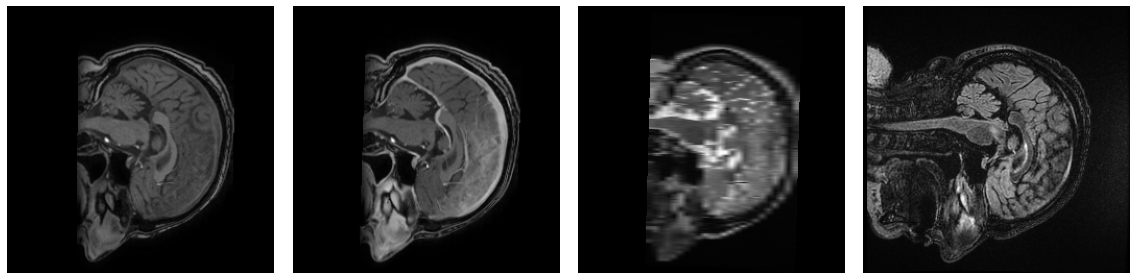

In [308]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[img_t1.shape[0]//2, ...], cmap='gray')
axs[1].imshow(img_t1c[img_t1c.shape[0]//2, ...], cmap='gray')
axs[2].imshow(img_t2[img_t2.shape[0]//2,...], cmap='gray')
axs[3].imshow(img_flair[ img_flair.shape[0]//2, ...], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [309]:
folder = Path('/anvar/public_datasets/preproc_study/bgpd/5_ss_shared')
patient = '255_18'#'607_18'#'608_18_4'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
img_seg = nibabel.load(folder / patient / 'FLAIR_mask.nii.gz').get_fdata().astype(bool)

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(160, 256, 256) (160, 256, 256) (160, 256, 256) (160, 256, 256)


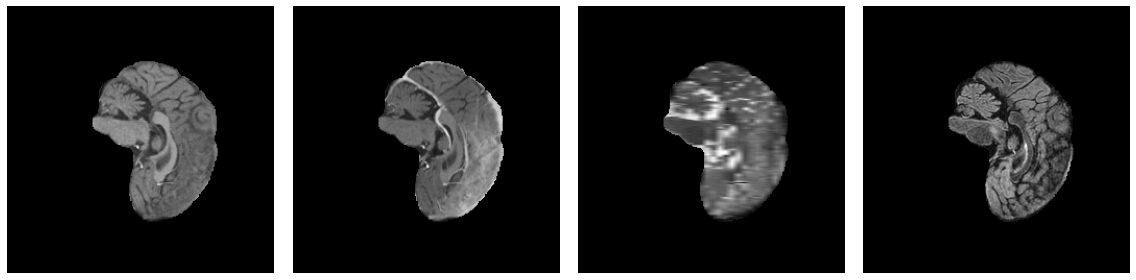

In [310]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

a =  img_t1.copy()
a[~img_seg] = 0

b = img_t1c.copy()
b[~img_seg] = 0

c = img_t2.copy()
c[~img_seg] = 0

d = img_flair.copy()
d[~img_seg] = 0



axs[0].imshow(a[a.shape[0]//2, ...], cmap='gray')
axs[1].imshow(b[b.shape[0]//2, ...], cmap='gray')
axs[2].imshow(c[c.shape[0]//2,...], cmap='gray')
axs[3].imshow(d[d.shape[0]//2, ...], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

(124, 256, 256) (124, 256, 256) (124, 256, 256) (124, 256, 256)


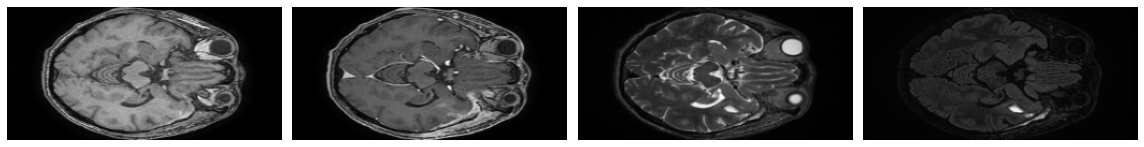

In [212]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[...,img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

(174, 256, 256) (174, 256, 256) (174, 256, 256) (174, 256, 256)


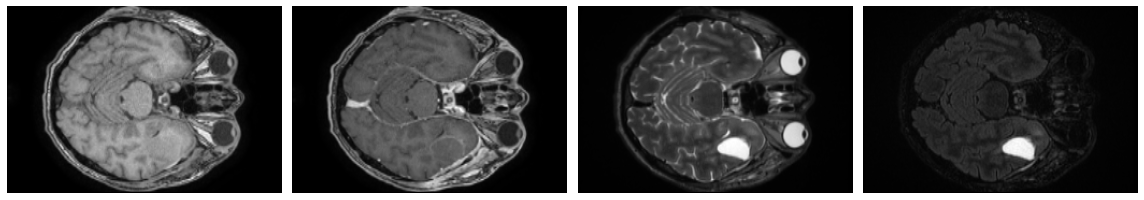

In [228]:
fig, axs = plt.subplots(1, 4, figsize=(16,6))

axs[0].imshow(img_t1[..., 120], cmap='gray')
axs[1].imshow(img_t1c[..., 120], cmap='gray')
axs[2].imshow(img_t2[..., 120], cmap='gray')
axs[3].imshow(img_flair[..., 120], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

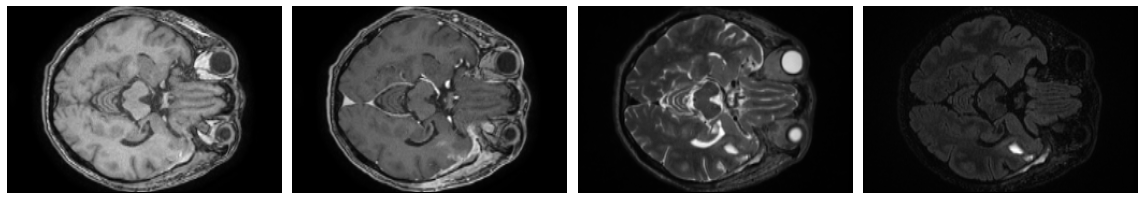

In [190]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[...,img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [188]:
img_t1[..., img_t1.shape[2]//2].shape

(174, 256)

In [315]:
folder = Path('/anvar/public_datasets/preproc_study/bgpd/2a_interp')
patient = '255_18'#'607_18'#'608_18_4'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)


# Inter-subject interpolation comparison

In [419]:
from tqdm import tqdm

In [435]:
def read_mrs(file, postfix):
    img1_zooms = nibabel.load(file / 'T1.nii.gz').header.get_zooms()
    img2_zooms = nibabel.load(file / 'CT1.nii.gz').header.get_zooms()
    img3_zooms = nibabel.load(file / 'T2.nii.gz').header.get_zooms()
    img4_zooms = nibabel.load(file / 'FLAIR.nii.gz').header.get_zooms()
    
    return {
        f'T1_{postfix}': img1_zooms,
        f'CT1_{postfix}': img2_zooms,
        f'T2_{postfix}': img3_zooms,
        f'FLAIR_{postfix}': img4_zooms
    }

In [436]:
root = Path('/anvar/public_datasets/preproc_study/gbm/')
folders = ['orig', '1_reg', '2a_interp', '3a_atlas', '4a_resamp']

dfs = []
for folder in folders:
    d_pipestep = []
    subjects = []
    for subj in tqdm((root / folder).glob('*')):
        subjects.append(subj.name)
        d_pipestep.append(read_mrs(subj,postfix=folder))
    dfs.append(d_pipestep)

102it [00:00, 390.66it/s]
102it [00:00, 403.44it/s]
102it [00:00, 398.49it/s]
102it [00:00, 407.35it/s]
102it [00:00, 398.45it/s]


In [451]:
df1 = pd.concat([
    pd.DataFrame(dfs[i]) for i in range(5)], axis=1)
df1['patient_id'] = subjects

In [453]:
def get_dist_1(x):
    x = np.array(list(x))
    return np.max(x-np.array([1,1,1]))
cols = ['T1_2a_interp','CT1_2a_interp','T2_2a_interp','FLAIR_2a_interp']
for col in cols:
    print(col)
    m = df1[col].apply(get_dist_1).argmax()
    v = df1[col].apply(get_dist_1).max()
    print(m, v)
    print(df1.patient_id[m])

T1_2a_interp
52 0.5555636882781982
TCGA-06-6389
CT1_2a_interp
52 0.5555636882781982
TCGA-06-6389
T2_2a_interp
52 0.5555636882781982
TCGA-06-6389
FLAIR_2a_interp
52 0.5555636882781982
TCGA-06-6389


In [459]:


folder = Path('/anvar/public_datasets/preproc_study/gbm/4a_resamp')
patient = 'TCGA-06-6389'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(240, 225, 240) (240, 225, 240) (240, 225, 240) (240, 225, 240)


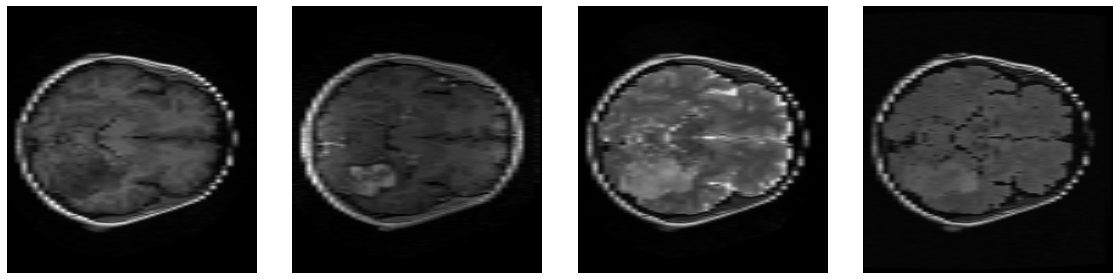

In [460]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[...,img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [468]:
folder = Path('/anvar/public_datasets/preproc_study/gbm/3a_atlas')
patient = 'TCGA-06-6389'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)


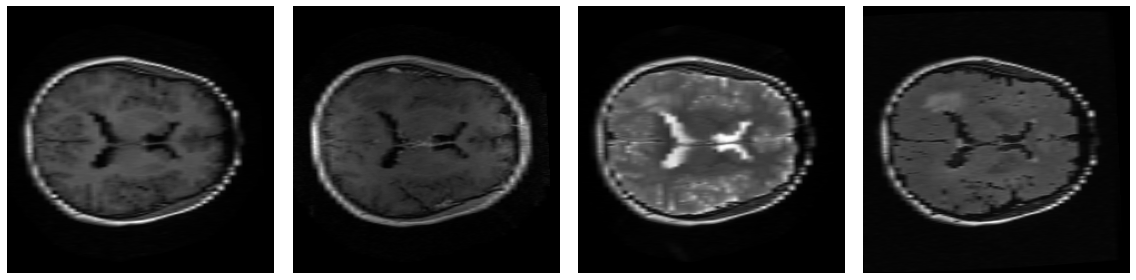

In [469]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[...,img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [470]:
folder = Path('/anvar/public_datasets/preproc_study/gbm/2a_interp')
patient = 'TCGA-06-6389'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)


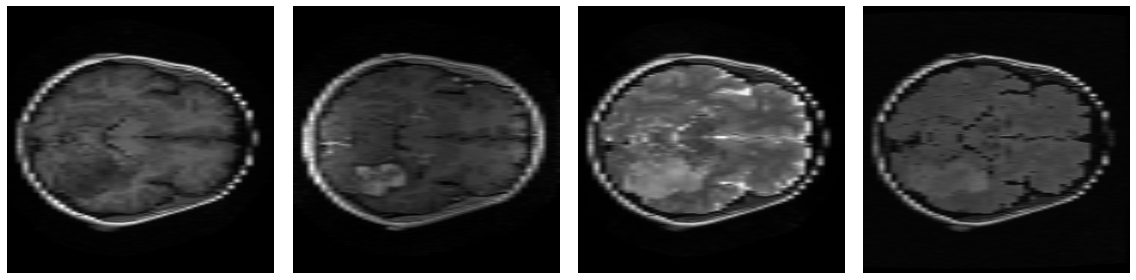

In [471]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[...,img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [463]:


folder = Path('/anvar/public_datasets/preproc_study/gbm/1_reg')
patient = 'TCGA-06-6389'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(512, 45, 512) (512, 45, 512) (512, 45, 512) (512, 45, 512)


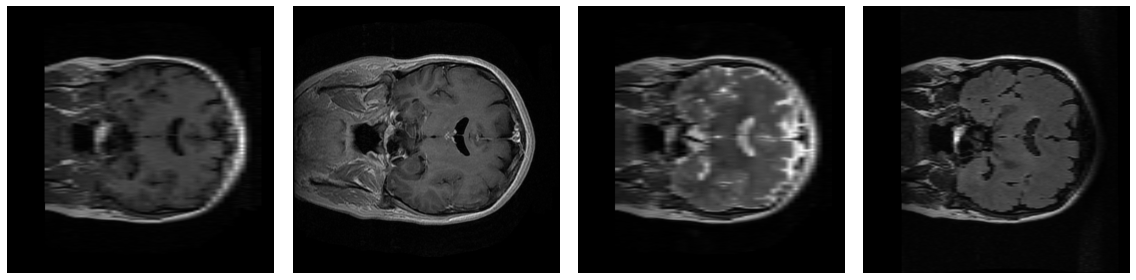

In [467]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[:, img_t1.shape[1]//2, :], cmap='gray')
axs[1].imshow(img_t1c[:, img_t1c.shape[1]//2, :], cmap='gray')
axs[2].imshow(img_t2[:, img_t2.shape[1]//2, :], cmap='gray')
axs[3].imshow(img_flair[:, img_flair.shape[1]//2, :], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()

In [461]:


folder = Path('/anvar/public_datasets/preproc_study/gbm/orig')
patient = 'TCGA-06-6389'

img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
# img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

print(img_t1c.shape, img_flair.shape, img_t1.shape, img_t2.shape)

(512, 512, 45) (512, 512, 78) (512, 512, 39) (512, 512, 39)


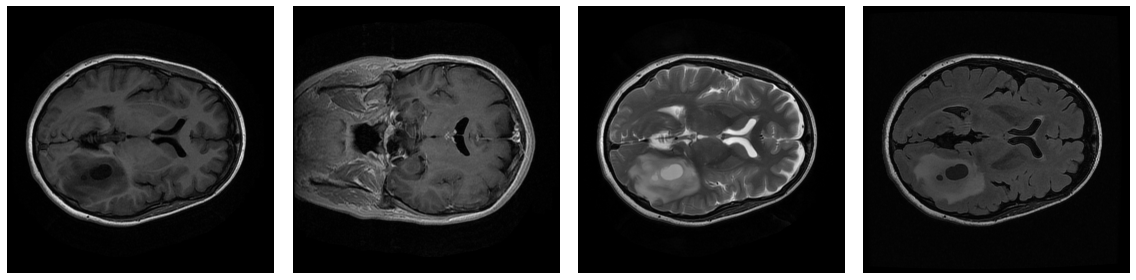

In [462]:
fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(img_t1[..., img_t1.shape[2]//2], cmap='gray')
axs[1].imshow(img_t1c[...,img_t1c.shape[2]//2], cmap='gray')
axs[2].imshow(img_t2[..., img_t2.shape[2]//2], cmap='gray')
axs[3].imshow(img_flair[..., img_flair.shape[2]//2], cmap='gray')

for ax in axs.flatten():
    ax.set_axis_off()
    
plt.tight_layout()